In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")

In [12]:
# utils
def plot_decision_boundary_2d(estimator,X,y,incr=0.01):
    x1, x2 = np.meshgrid(
        np.arange(np.min(X[:,0]),np.max(X[:,0]),incr),
        np.arange(np.min(X[:,1]),np.max(X[:,1]),incr)
    )
    x1_r, x2_r = x1.flatten().reshape(-1,1), x2.flatten().reshape(-1,1)
    y_grid = estimator.predict(np.concatenate([x1_r,x2_r],axis=1)).reshape(x1.shape)

    plt.figure(figsize=(10,10))
    plt.contourf(x1,x2,y_grid,colors=['b','b','r','r'],alpha=0.5,levels=len(np.unique(y)))
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette=['b','r'])
    plt.xlabel('x$_1$')
    plt.ylabel('x$_2$')
    plt.xlim([np.min(X[:,0]),np.max(X[:,0])])
    plt.ylim([np.min(X[:,1]),np.max(X[:,1])]);

### Linear Regression

In [13]:
class LinearRegression:
    def __init__(self,lamda=0):
        self.lamda = lamda

    def __cost_gradient(self,X,j):
        m = X.shape[0]
        return np.sum(((X @ self.theta)-y.reshape(m,1))*np.expand_dims(X[:,j],-1),axis=0)/m + self.lamda/m * self.theta[j]
        
    def fit(self,X,y,alpha=0.001,epochs=100):
        m, n = X.shape[0], X.shape[1]
        X = np.concatenate([np.ones((m,1)),X],axis=1)
        self.theta = np.random.rand(n+1,1)
        gradients = np.zeros((n+1,1))
        for epoch in range(epochs):
            for j in range(n+1):
                gradients[j] = self.__cost_gradient(X,j)
            self.theta = self.theta- alpha * gradients
            yield X @ self.theta, self.theta
            
    def predict(self,X):
        m = X.shape[0]
        X = np.concatenate([np.ones((m,1)),X],axis=1)
        return (X @ self.theta).flatten()

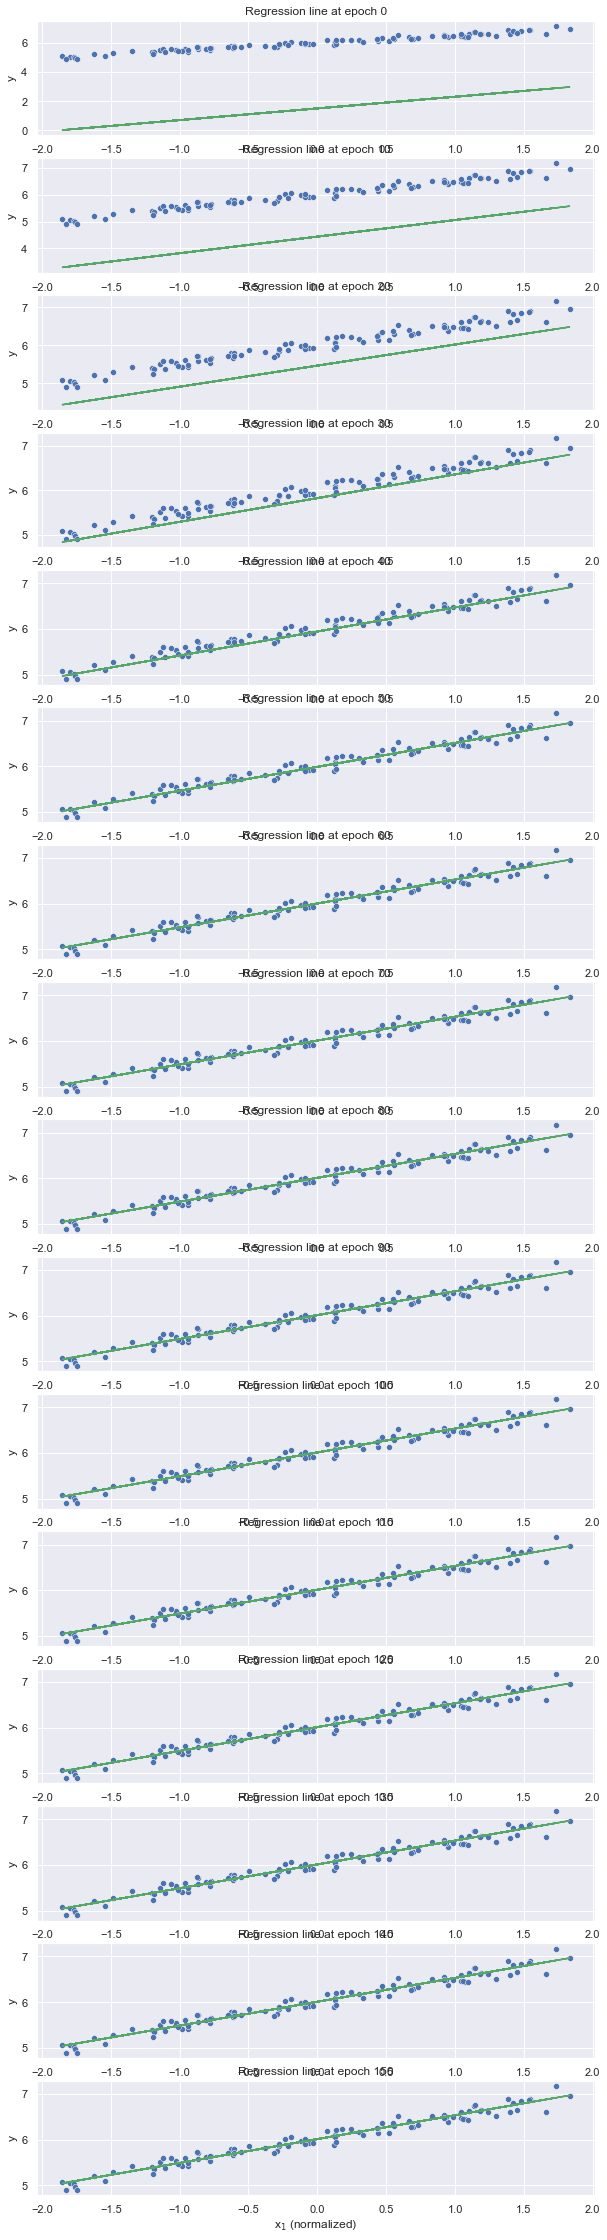

In [14]:
m = 100
n = 1
X = np.random.rand(m,n)
y = 2*X[:,0] + 5 + np.random.normal(0,0.1,m)
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

lr = LinearRegression()
mse = []

k = 0
i = 1
n_epochs = 151
plt.figure(figsize=(10,40))
for y_hat, theta in lr.fit(X,y,0.1,n_epochs):
    mse.append(np.sum((y_hat-y.reshape(m,1))**2,axis=0)/(2*m))
    if k % 10 == 0:
        plt.subplot(n_epochs//10+1,1,i)
        sns.scatterplot(X[:,0],y)
        plt.plot(X[:,0],y_hat,color='g')
        plt.title(f'Regression line at epoch {k}')
        plt.xlabel("x$_1$ (normalized)")
        plt.ylabel("y")
        i += 1
    k += 1

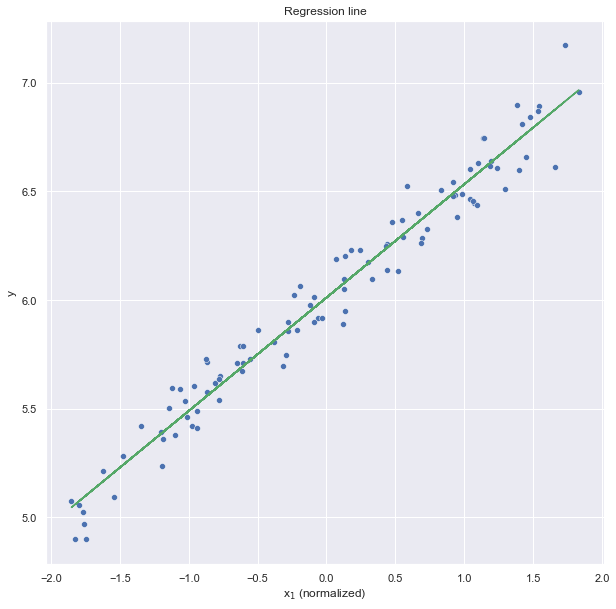

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0],y)
plt.plot(X[:,0],y_hat,color='g')
plt.title(f'Regression line')
plt.xlabel("x$_1$ (normalized)")
plt.ylabel("y");

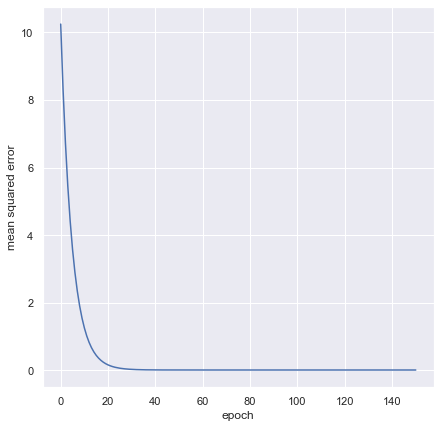

In [16]:
plt.figure(figsize=(7,7))
plt.plot(mse)
plt.xlabel("epoch")
plt.ylabel("mean squared error");

## Nearest Neighbor

In [17]:
def euclidean_distance(p1,p2):
    return np.sum((p1-p2)**2)

class KNNRegression:
    def __init__(self,k=3):
        self.k = k

    def fit(self,X,y):
        self.points = list(zip(X,y))

    def predict(self,X):
        m = X.shape[0]
        y_pred = []
        for i in range(m):
            sorted_points = sorted(self.points,key=lambda p1: euclidean_distance(p1[0],X[i,:]))
            k_closest_points = sorted_points[:self.k]
            y_pred.append(np.mean(k_closest_points,axis=0)[1])
        return np.array(y_pred)

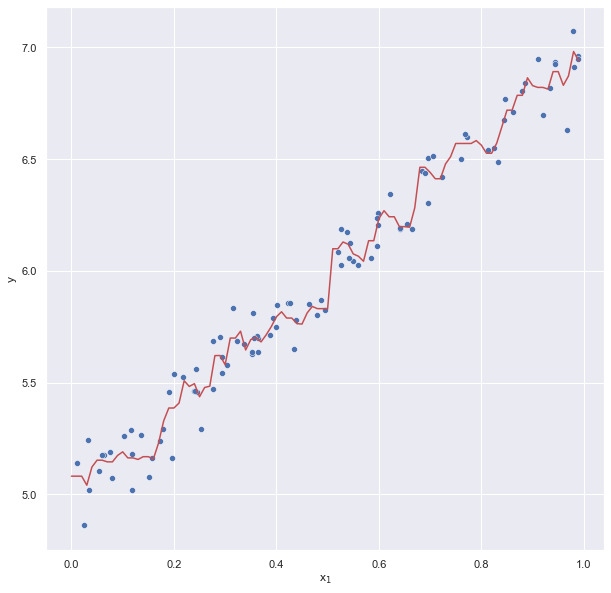

In [18]:
m = 100
n = 1
X = np.random.rand(m,n)
y = 2*X[:,0] + 5 + np.random.normal(0,0.1,m)
k = 3
knn = KNNRegression(k=k)
knn.fit(X,y)

X_sweep = np.arange(0,1,0.01).reshape(-1,1)
y_sweep = knn.predict(X_sweep)

plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0],y)
plt.plot(X_sweep,y_sweep,color='r')
plt.xlabel("x$_1$")
plt.ylabel("y");

In [19]:
def euclidean_distance(p1,p2):
    return np.sum((p1-p2)**2)

class KNNClassification:
    def __init__(self,k=3):
        self.k = k

    def fit(self,X,y):
        self.points = list(zip(X,y))

    def predict(self,X):
        m = X.shape[0]
        y_pred = []
        for i in range(m):
            sorted_points = sorted(self.points,key=lambda p1: euclidean_distance(p1[0],X[i,:]))
            k_closest_points = sorted_points[:self.k]
            counts = {}
            for point in k_closest_points:
                counts[point[1]] = counts[point[1]] + 1 if point[1] in counts else 0
            y_pred.append(max(counts,key=lambda label: counts[label]))
        return np.array(y_pred)

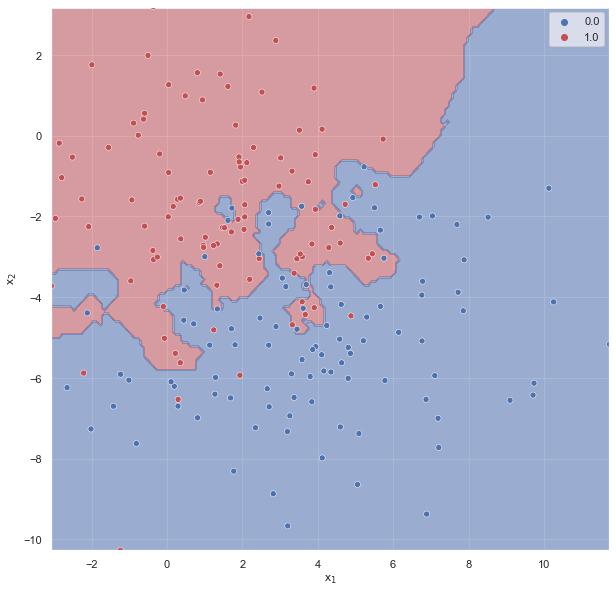

In [20]:
m = 200
n = 2
X1 = np.concatenate([np.random.normal(1,2,size=m//2),np.random.normal(4,3,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,2,size=m//2),np.random.normal(5,2,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)])

k = 3
knn = KNNClassification(k=k)
knn.fit(X,y)

plot_decision_boundary_2d(knn,X,y,0.1)

## Logistic Regression

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression:  
    def __init__(self,lamda=0):
        self.lamda = lamda

    def __cost_gradient(self,X,j):
        m = X.shape[0]
        return np.sum((sigmoid(X @ self.theta)-y.reshape(m,1))*np.expand_dims(X[:,j],-1),axis=0)/m + self.lamda/m * self.theta[j]
    
    def fit(self,X,y,alpha=0.001,epochs=100):
        m, n = X.shape[0], X.shape[1]
        X = np.concatenate([np.ones((m,1)),X],axis=1)
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        if n_classes == 2:
            self.theta = np.random.rand(n+1,1)
            gradients = np.zeros((n+1,1))
            for epoch in range(epochs):
                for j in range(n+1):
                    gradients[j] = self.__cost_gradient(X,j)
                self.theta = self.theta - alpha * gradients
                yield X @ self.theta, self.theta
        else:
            self.theta = np.random.rand(n+1,n_classes)
            for k in range(n_classes):
                gradients = np.zeros(n+1)
                for epoch in range(epochs):
                    for j in range(n+1):
                        gradients[j] = self.__cost_gradient(X,j)
                    self.theta[:,k] = self.theta[:,k] - alpha * gradients
                    yield X @ self.theta, self.theta

    def predict(self,X):
        m = X.shape[0]
        X = np.concatenate([np.ones((m,1)),X],axis=1)
        n_classes = len(self.classes)
        if n_classes == 2:
            return np.array(sigmoid(X @ self.theta) >= 0.5, dtype=int).flatten()
        return np.argmax(sigmoid(X @ self.theta),axis=1).flatten()

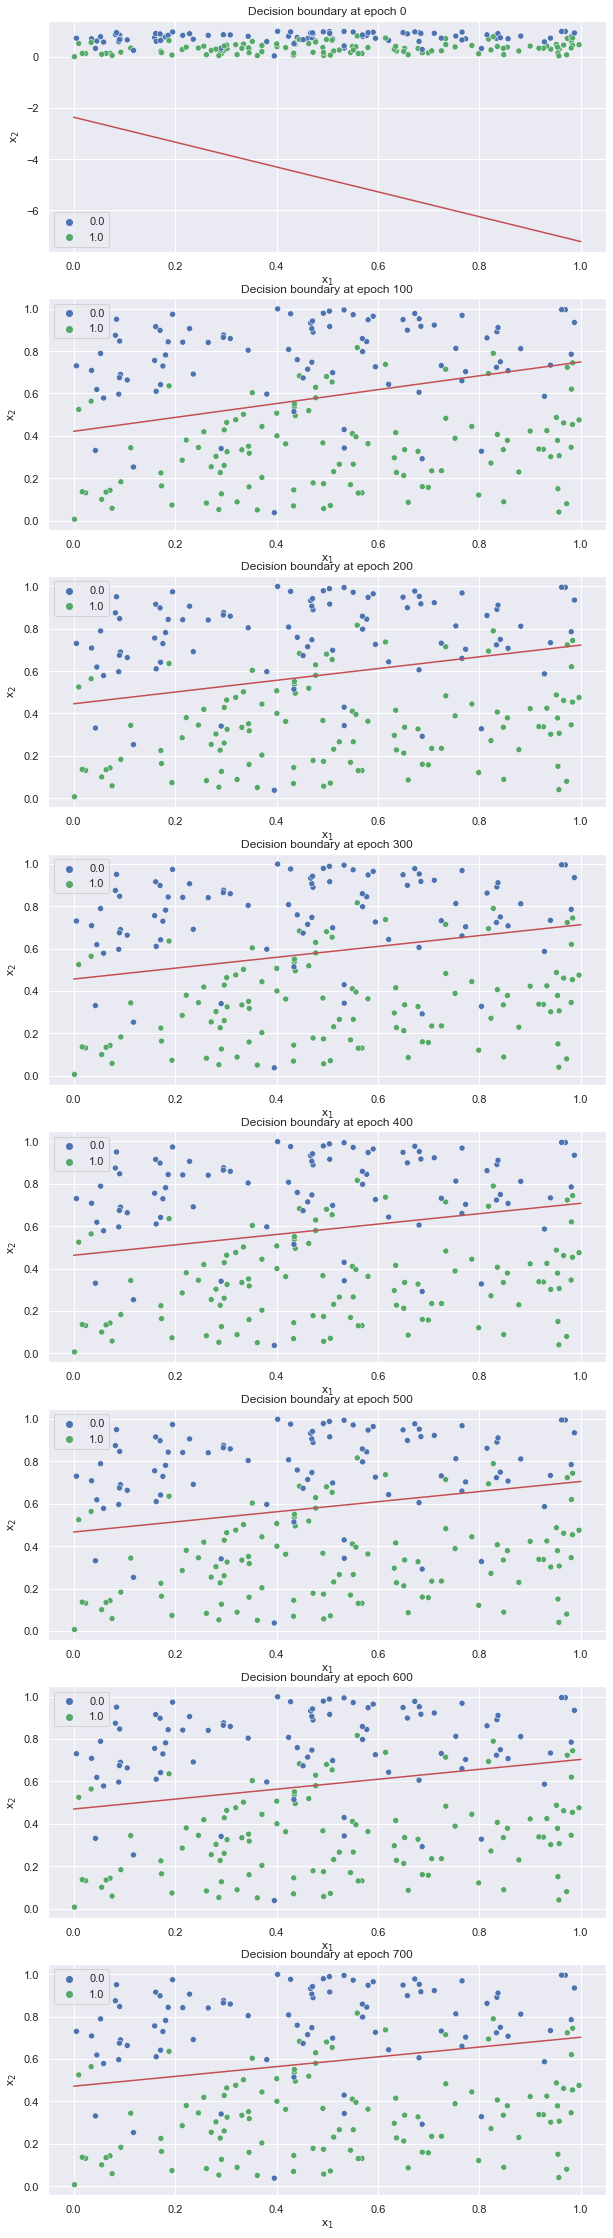

In [22]:
m = 200
n = 2
X = np.random.rand(m,n)
y = np.zeros(m)
for i in range(m):
    y[i] = np.random.binomial(1,sigmoid(5+2*X[i,0]-10*X[i,1]))

logreg = LogisticRegression()
cost = []

k = 0
i = 1
n_epochs = 701
plt.figure(figsize=(10,40))
for X_theta, theta in logreg.fit(X,y,0.8,n_epochs):
    cost.append(-np.sum((y.reshape(m,1)*np.log(sigmoid(X_theta))+(1-y.reshape(m,1))*np.log(1-sigmoid(X_theta))),axis=0)/m)
    if k % 100 == 0:
        plt.subplot(n_epochs//100+1,1,i)
        sns.scatterplot(X[:,0],X[:,1],hue=y,palette=['b','g'])
        decision_x = np.arange(0,1.1,0.1)
        decision_y = -(theta[0] + theta[1]*decision_x)/theta[2]
        plt.plot(decision_x,decision_y,color='r')
        plt.title(f'Decision boundary at epoch {k}')
        plt.xlabel("x$_1$")
        plt.ylabel("x$_2$")
        i += 1
    k += 1

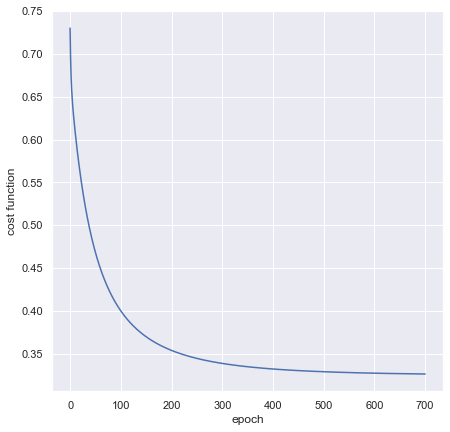

In [23]:
plt.figure(figsize=(7,7))
plt.plot(cost)
plt.xlabel("epoch")
plt.ylabel("cost function");

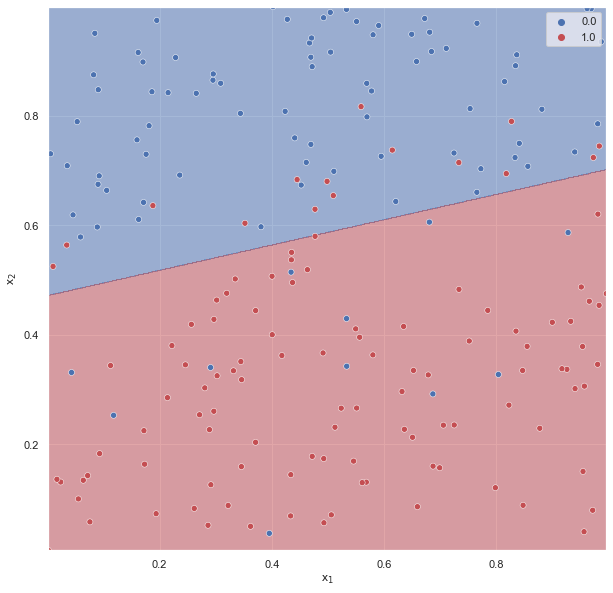

In [24]:
plot_decision_boundary_2d(logreg,X,y,0.001)

## Support Vector Machines

In [25]:
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

def sign(x):
    x[x < 0] = -1
    x[x >= 0] = 1
    return x

class SVM:    
    def __init__(self,kernel='linear',d=2,C=100):
        self.kernel = kernel
        self.d = d
        self.C = C

    def __kernel(self,x,z):
        if(self.kernel=='linear'):
            K = np.inner(x,z)
        elif(self.kernel=='polynomial'):
            inner_prod = np.inner(x,z)
            K = 1
            for t in range(self.d-1):
                K += inner_prod
                inner_prod *= inner_prod
        return K

    def fit(self,X,y):
        m, n = X.shape[0], X.shape[1]
        y[y == 0] = -1
        P = np.zeros((m,m))
        for i in range(m):
            for j in range(m):
                P[i,j] = y[i]*y[j]*self.__kernel(X[i,:],X[j,:])
        P = matrix(P)
        q = matrix(-np.ones(m))
        A = matrix(y.reshape(1,m))
        G = matrix(np.concatenate([np.eye(m),-np.eye(m)],axis=0))
        h = matrix(np.concatenate([np.full(m,self.C),np.zeros(m)],axis=0))
        b = matrix(np.zeros(1))
        self.alpha = np.array(solvers.qp(P=P,q=q,G=G,h=h,A=A,b=b)['x'])
        self.w = np.sum(y.reshape(m,1)*X*self.alpha,axis=0).transpose()
        on_margin = np.logical_and(self.alpha[:,0] > 10e-4,self.alpha[:,0] < self.C)
        X_margin, y_margin = X[on_margin], y[on_margin]
        self.b = -(np.min((X_margin @ self.w)[y_margin == -1]) + np.max((X_margin @ self.w)[y_margin == 1]))/2
        self.x, self.y = X[self.alpha[:,0] > 10e-4], y[self.alpha[:,0] > 10e-4]
        self.alpha = self.alpha[self.alpha[:,0] > 10e-4]
        return X_margin, y_margin
        
    def predict(self,X):
        K = np.zeros((self.x.shape[0],X.shape[0]))
        for i in range(self.x.shape[0]):
            for j in range(X.shape[0]):
                K[i,j] = self.__kernel(self.x[i,:],X[j,:])
        return np.array(sign(np.sum(self.alpha*self.y.reshape(-1,1)*K,axis=0)+self.b),dtype=int)

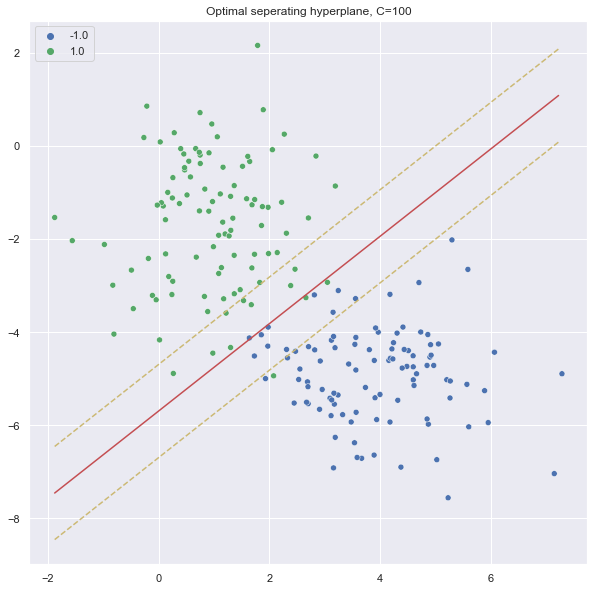

In [26]:
m = 200
n = 2
X1 = np.concatenate([np.random.normal(1,1,size=m//2),np.random.normal(4,1,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,1.5,size=m//2),np.random.normal(5,1,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)])

C = 100
svm = SVM(kernel='linear',C=C)
X_margin, y_margin = svm.fit(X,y)

plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0],X[:,1],hue=y,palette=['b','g'])
hyperplane_x1 = np.arange(np.min(X[:,0]),np.max(X[:,0]),0.1)
hyperplane_x2 = -(svm.w[0]*hyperplane_x1+svm.b)/svm.w[1]
plt.plot(hyperplane_x1,hyperplane_x2,color='r')

margin1_x2 = hyperplane_x2 + 1
margin2_x2 = hyperplane_x2 - 1
plt.plot(hyperplane_x1,margin1_x2,'--',color='y',linewidth=1.5)
plt.plot(hyperplane_x1,margin2_x2,'--',color='y',linewidth=1.5)

plt.title(f'Optimal seperating hyperplane, C={C}');

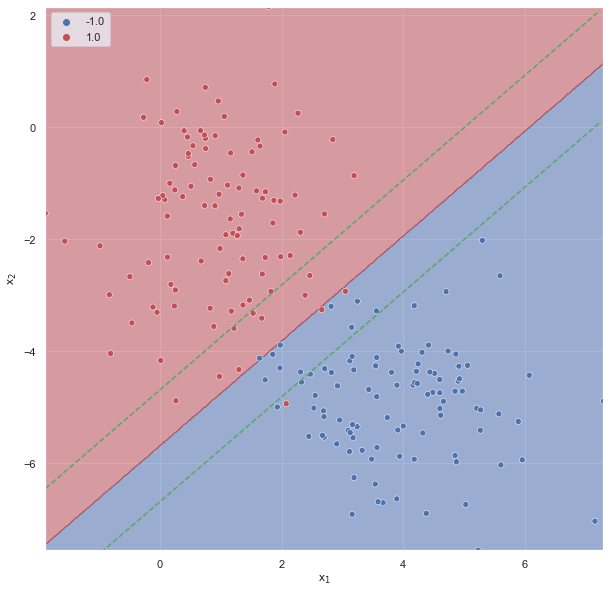

In [27]:
plot_decision_boundary_2d(svm,X,y)
plt.plot(hyperplane_x1,margin1_x2,'--',color='g',linewidth=1.5)
plt.plot(hyperplane_x1,margin2_x2,'--',color='g',linewidth=1.5);

## Principal Components Analysis

In [28]:
class PCA:
    def __init__(self,k):
        self.k = k

    def fit(self,X):
        m, n = X.shape[0], X.shape[1]
        for j in range(n):
            X[:,j] = (X[:,j] - np.mean(X[:,j]))/(np.std(X[:,j]))
        cov_mat = np.cov(X.transpose())
        eig_values, eig_vectors = np.linalg.eig(cov_mat)
        self.principal_components = np.array([v for _, v in sorted(zip(eig_values, eig_vectors), key=lambda eigen_pair: eigen_pair[0])][:self.k])


    def transform(self,X):
        y = np.zeros((X.shape[0],self.k))
        for i in range(X.shape[0]):
            for j in range(self.k):
                y[i,j] = np.dot(X[i,:],self.principal_components[j])
        return y

Text(0, 0.5, 'principal component 2')

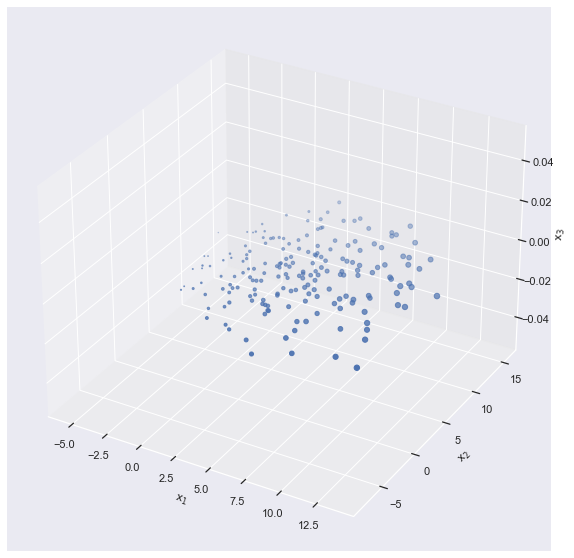

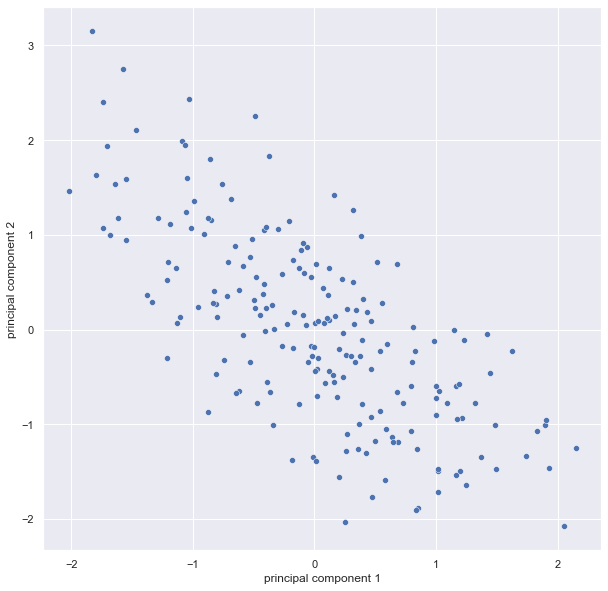

In [29]:
m = 200
n = 3
X1 = np.random.normal(4,4,size=m)
X2 = np.random.normal(5,5,size=m)
X3 = 2*X1 + 3 + np.random.normal(0,1,size=m)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1),X3.reshape(m,1)],axis=1)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
plt.scatter(X1,X2,X3)
ax.set_xlabel("x$_1$")
ax.set_ylabel("x$_2$")
ax.set_zlabel("x$_3$");

pca = PCA(k=2)
pca.fit(X)
y = pca.transform(X)

plt.figure(figsize=(10,10))
sns.scatterplot(y[:,0],y[:,1])
plt.xlabel("principal component 1")
plt.ylabel("principal component 2");


## Decision Trees

In [30]:
class TreeNode:
    def __init__(self,y_pred=0,j=None,s=None):
        self.j = j
        self.s = s
        self.y = y_pred
        self.left = None
        self.right = None

In [31]:
class RegressionDecisionTree:
    def __init__(self,max_depth=None,min_samples_split=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split

    def __criterion(self,j,s,X,y):
        return np.sum((y[X[:,j]<s]-np.mean(y[X[:,j]<s]))**2) + np.sum((y[X[:,j]>=s]-np.mean(y[X[:,j]>=s]))**2)
        
    def __split(self,X_js,y_js,d,current_node):
        m, n = X_js.shape[0], X_js.shape[1]
        j_best, s_best = 0, np.random.choice(np.unique(X[:,0]))
        min_criterion = self.__criterion(j_best,s_best,X_js,y_js)
        for j in range(n):
            for s in np.unique(X[:,j]):
                criterion = self.__criterion(j,s,X_js,y_js)
                if  criterion < min_criterion:
                    j_best, s_best = j, s
                    min_criterion = criterion
        current_node.j = j_best
        current_node.s = s_best
        if(self.max_depth is None or d < self.max_depth-1):
            if(len(y_js[X_js[:,j_best]<s_best])>=self.min_samples_split):
                current_node.left = TreeNode(np.mean(y_js[X_js[:,j_best]<s_best]))
                self.__split(X_js[X_js[:,j_best]<s_best],y_js[X_js[:,j_best]<s_best],d+1,current_node.left)
            if(len(y_js[X_js[:,j_best]>=s_best])>=self.min_samples_split):
                current_node.right = TreeNode(np.mean(y_js[X_js[:,j_best]>=s_best]))
                self.__split(X_js[X_js[:,j_best]>=s_best],y_js[X_js[:,j_best]>=s_best],d+1,current_node.right)
        
    def fit(self,X,y):
        self.tree = TreeNode(np.mean(y))
        self.__split(X,y,0,self.tree)
    
    def predict(self,X):
        m = X.shape[0]
        y_pred = []
        for i in range(m):
            current_node = self.tree
            y = current_node.y
            while(current_node is not None):
                y = current_node.y
                if(X[i,current_node.j]<current_node.s):
                    current_node = current_node.left
                else:
                    current_node = current_node.right
            y_pred.append(y)
        return np.array(y_pred)

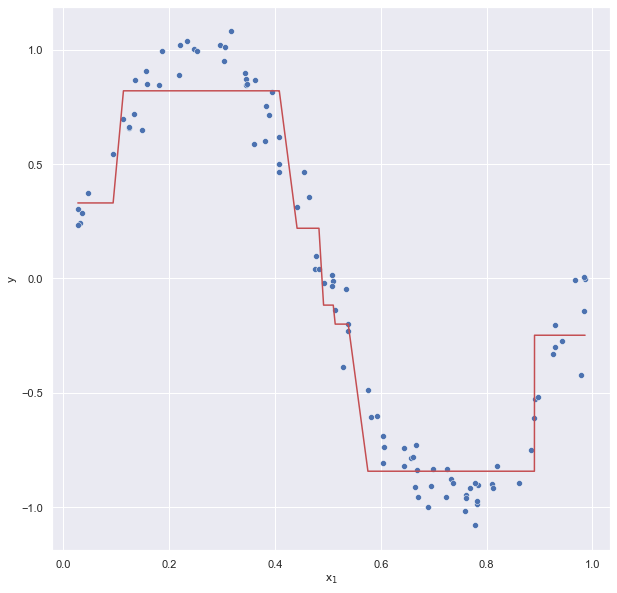

In [32]:
m = 100
n = 1
X = np.random.rand(m,n)
y = np.sin(2*np.pi*X[:,0]) + np.random.normal(0,0.1,m)

tree = RegressionDecisionTree(max_depth=4,min_samples_split=5)
tree.fit(X,y)
y_pred = tree.predict(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0],y=y)
sns.lineplot(x=X[:,0],y=y_pred,color='r')
plt.xlabel('x$_1$')
plt.ylabel('y');

In [33]:
class ClassificationDecisionTree:
    def __init__(self,max_depth=None,min_samples_split=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.classes = []
        
    def __proportions(self,y):
        p = np.zeros(len(self.classes))
        for i in range(len(p)):
            p[i] = np.mean(y==self.classes[i])
        return p

    def __criterion(self,j,s,X,y):
        p1 = self.__proportions(y[X[:,j]<s])
        p2 = self.__proportions(y[X[:,j]>=s])
        return np.sum(p1*(1-p1)) + np.sum(p2*(1-p2))
        
    def __split(self,X_js,y_js,d,current_node):
        m, n = X_js.shape[0], X_js.shape[1]
        j_best, s_best = 0, np.random.choice(np.unique(X[:,0]))
        min_criterion = self.__criterion(j_best,s_best,X_js,y_js)
        for j in range(n):
            for s in np.unique(X[:,j]):
                criterion = self.__criterion(j,s,X_js,y_js)
                if  criterion < min_criterion:
                    j_best, s_best = j, s
                    min_criterion = criterion
        current_node.j = j_best
        current_node.s = s_best
        if(self.max_depth is None or d < self.max_depth-1):
            if(len(y_js[X_js[:,j_best]<s_best])>=self.min_samples_split):
                p1 = self.__proportions(y_js[X_js[:,j_best]<s_best])
                current_node.left = TreeNode(np.argmax(p1))
                self.__split(X_js[X_js[:,j_best]<s_best],y_js[X_js[:,j_best]<s_best],d+1,current_node.left)
            if(len(y_js[X_js[:,j_best]>=s_best])>=self.min_samples_split):
                p2 = self.__proportions(y_js[X_js[:,j_best]>=s_best])
                current_node.right = TreeNode(np.argmax(p2))
                self.__split(X_js[X_js[:,j_best]>=s_best],y_js[X_js[:,j_best]>=s_best],d+1,current_node.right)

    def fit(self,X,y):
        self.classes = np.unique(y)
        p = self.__proportions(y)
        self.tree = TreeNode(np.argmax(p))
        self.__split(X,y,0,self.tree)
    
    def predict(self,X):
        m = X.shape[0]
        y_pred = []
        for i in range(m):
            current_node = self.tree
            y = current_node.y
            while(current_node is not None):
                y = current_node.y
                if(X[i,current_node.j]<current_node.s):
                    current_node = current_node.left
                else:
                    current_node = current_node.right
            y_pred.append(y)
        return np.array(y_pred)

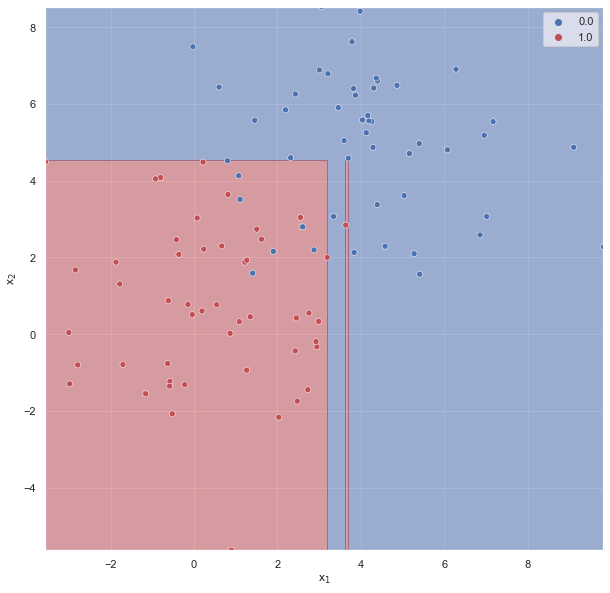

In [34]:
m = 100
n = 2
X1 = np.concatenate([np.random.normal(0,2,m//2),np.random.normal(4,2,m//2)],axis=0)
X2 = np.concatenate([np.random.normal(1,2,m//2),np.random.normal(5,2,m//2)],axis=0)
X = np.concatenate([np.expand_dims(X1,-1),np.expand_dims(X2,-1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)],axis=0)

tree = ClassificationDecisionTree(max_depth=8)
tree.fit(X,y)

plot_decision_boundary_2d(tree,X,y)

## Random Forest

In [35]:
class RandomForestRegression:
    def __init__(self,n_trees=100,max_depth=None,min_samples_split=1,n_features=None,p_samples=1):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = n_features
        self.p_samples = p_samples
        self.trees = []

    def fit(self,X,y):
        m, n = X.shape[0], X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n))
        for b in range(self.n_trees):
            cols = sorted(np.random.choice(np.arange(0,n,1),replace=False,size=self.max_features))
            samples = sorted(np.random.choice(np.arange(0,m,1),replace=False,size=int(self.p_samples*m)))
            X_b = X[:,cols]
            X_b = X_b[samples,:]
            tree = RegressionDecisionTree(max_depth=self.max_depth,min_samples_split=self.min_samples_split)
            tree.fit(X_b,y)
            self.trees.append(tree)
    
    def predict(self,X):
        m = X.shape[0]
        y_pred =  np.zeros((m,self.n_trees))
        for b in range(self.n_trees):
            y_pred[:,b] = self.trees[b].predict(X)
        y_pred = np.mean(y_pred,axis=1)
        return y_pred  

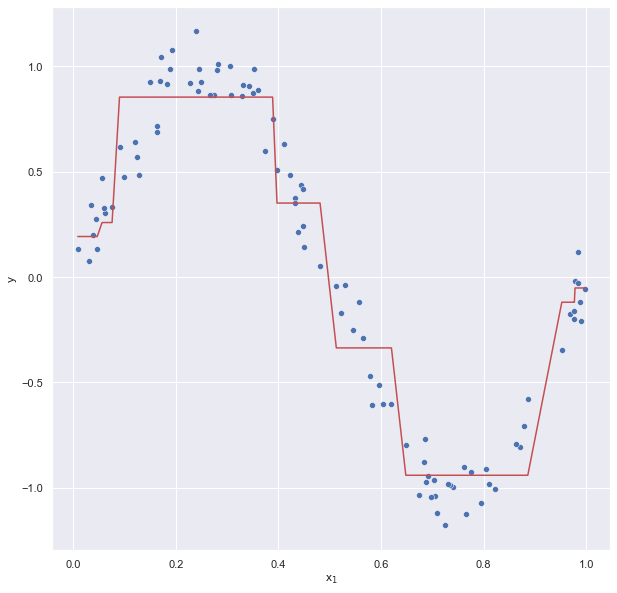

In [36]:
m = 100
n = 1
X = np.random.rand(m,n)
y = np.sin(2*np.pi*X[:,0]) + np.random.normal(0,0.1,m)

forest = RandomForestRegression(n_trees=100,max_depth=4,min_samples_split=5)
forest.fit(X,y)
y_pred = forest.predict(X)

plt.figure(figsize=(10,10))
sns.scatterplot(x=X[:,0],y=y)
sns.lineplot(x=X[:,0],y=y_pred,color='r')
plt.xlabel('x$_1$')
plt.ylabel('y');

In [37]:
class RandomForestClassification:
    def __init__(self,n_trees=100,max_depth=None,min_samples_split=1,max_features=None,p_samples=1):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.p_samples = p_samples
        self.trees = []

    def fit(self,X,y):
        m, n = X.shape[0], X.shape[1]
        if self.max_features is None:
            self.max_features = int(np.sqrt(n))
        for b in range(self.n_trees):
            cols = sorted(np.random.choice(np.arange(0,n,1),replace=False,size=self.max_features))
            samples = sorted(np.random.choice(np.arange(0,m,1),replace=False,size=int(self.p_samples*m)))
            X_b = X[:,cols]
            X_b = X_b[samples,:]
            tree = ClassificationDecisionTree(max_depth=self.max_depth,min_samples_split=self.min_samples_split)
            tree.fit(X_b,y)
            self.trees.append(tree)
    
    def predict(self,X):
        m = X.shape[0]
        y_pred =  np.zeros((m,self.n_trees))
        for b in range(self.n_trees):
            y_pred[:,b] = self.trees[b].predict(X)
        for i in range(m):
            counts = {}
            for b in range(self.n_trees):
                counts[y_pred[i,b]] = counts[y_pred[i,b]] + 1 if y_pred[i,b] in counts else 0
            y_pred[i,0] = max(counts,key=lambda label: counts[label])
        return y_pred[:,0]   

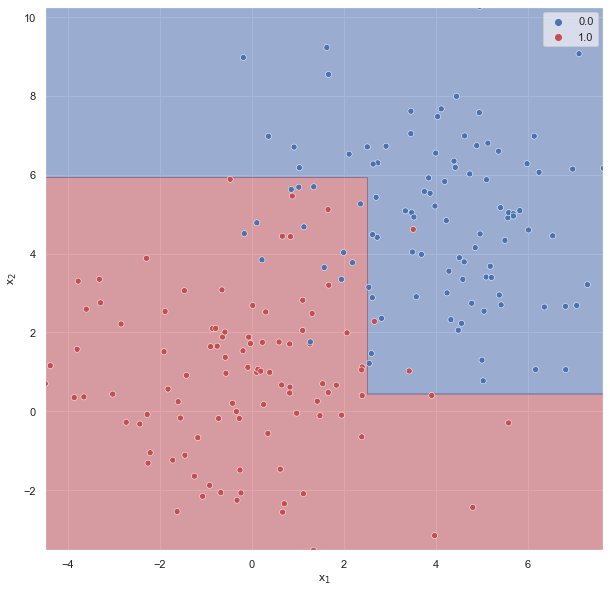

In [38]:
m = 200
n = 2
X1 = np.concatenate([np.random.normal(0,2,m//2),np.random.normal(4,2,m//2)],axis=0)
X2 = np.concatenate([np.random.normal(1,2,m//2),np.random.normal(5,2,m//2)],axis=0)
X = np.concatenate([np.expand_dims(X1,-1),np.expand_dims(X2,-1)],axis=1)
y = np.concatenate([np.ones(m//2),np.zeros(m//2)],axis=0)

forest = RandomForestClassification(n_trees=100,max_depth=5,max_features=2)
forest.fit(X,y)

plot_decision_boundary_2d(forest,X,y)